# Decision Tree Classification in Python
In this tutorial, learn Decision Tree Classification, attribute selection measures, and how to build and optimize __Decision Tree Classifier__ using Python `Scikit-learn` package.

## Background

As a marketing manager, you want a set of customers who are most likely to purchase your product. This is how you can save your marketing budget by finding your audience. As a loan manager, you need to identify risky loan applications to achieve a lower loan default rate. This process of classifying customers into a group of potential and non-potential customers or safe or risky loan applications is known as a __classification problem__. Classification is a two-step process, __learning step__ and __prediction step__:
- In the learning step, the model is developed based on given training data. 
- In the prediction step, the model is used to predict the response for given data. 

Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both __classification__ and __regression__ types of problems. In this tutorial, we focus mainly on __Decision Tree Classifiers__, if you are interested in other types of decision trees (e.g. Classification and Regression Tree, CART), [this post](https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/) can be a good starting point.

In this tutorial, you are going to cover the following topics:

- [Decision Tree Algorithm](#The-Decision-Tree-Algorithm)
- [How does the Decision Tree algorithm work?](#How-does-the-Decision-Tree-algorithm-work?)
- [Attribute Selection Measures](#Attribute-Selection-Measures)
    - [_Information Gain_](#Information-Gain)
    - [_Gain Ratio_](#Gain-Ratio)
    - [_Gini index_](#Gini-index)
- [Decision Tree Classifier Building in Scikit-learn](#Decision-Tree-Classifier-Building-in-Scikit-learn)
- [Optimizing Decision Tree Performance](#Optimizing-Decision-Tree-Performance)
- [Pros](#Pros) and [Cons](#Cons)
- [Conclusion](#Conclusion)

Let's get started with the algorithm itself.

## The Decision Tree Algorithm

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute) in your dataset, the branch represents a decision rule, and each leaf node represents the outcome of the rule. The topmost node in a decision tree is known as the __root__ node. It learns to partition on the basis of the __attribute value__ (_e.g., age < 25 or age >= 25_). It partitions the tree in a recursive manner called __recursive partitioning__. This flowchart-like structure helps you in the decision making process. The tree can be visualized as following figure, which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

<img src = 'https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png' />

That is why we call Decision Tree a __white box__ type of ML algorithm (comparing to black boxes like SVM and Neural Net, which we will discuss later in this class). It shares internal decision-making logic, which is not available in the black box type of algorithms. Its training time is shorter compared to more advanced algorithms. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a __distribution-free__ or non-parametric method, which does not depend upon probability distribution assumptions (does NOT assume the bell shape, but it is a linear-based algorithm). Decision trees can handle high dimensional data with fairly good accuracy.

[Back to Top](#Background)

## How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:

- Select the best attribute using the __Attribute Selection Measures (ASM)__ to split the records.
- Make that attribute a decision node and breaks the dataset into smaller subsets.
- Starts tree building by repeating this process recursively for each child until one of the condition will match:
    - All the tuples belong to the same attribute value.
    - There are no more remaining attributes.
    - There are no more instances.

<img src = 'https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/2_btay8n.png' />

Next, we are going to spend some time on the first important concept in the decision tree algorithm, namely Attribute Selection Measures (ASM).

[Back to Top](#Background)

## Attribute Selection Measures
Attribute selection measure is a heuristic for selecting the splitting criterion that partition data in the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node (e.g. split atrribute _age_ on value `25`). ASM provides a rank to each feature (or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute (Source). In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are __Information Gain__, __Gain Ratio__, and __Gini Index__.

### Information Gain
Shannon invented the concept of __entropy__, which measures the impurity of the input set. In physics and mathematics, entropy referred as the _randomness_ or the _impurity_ in the system. In information theory, it refers to the impurity in a group of examples. Information gain is the reverse in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. __ID3__ (Iterative Dichotomiser) decision tree algorithm uses information gain. Information gain is calculated via equation (1) to (3).

$$ \begin{equation} \label{eq:eq1}
Info(D) = -\sum_{i=1}^m p_i \log_2{p_i} \quad\quad \text{(1)}
\end{equation}$$

Where, $p_i$ is the probability that an arbitrary tuple in $D$ belongs to class $C_i$.

And,

$$ Info_A(D) = \sum_{j=1}^V {\frac{|D_j|}{|D|}} \times Info(D_j) \quad\quad \text{(2)}$$

Then,

$$ Gain(D) = Info(D) - Info_A(D) \quad\quad \text{(3)}$$

Where,

- $Info(D)$ is the average amount of information needed to identify the class label of a tuple in $D$.
- ${\frac{|D_j|}{|D|}}$ acts as the weight of the $j^{th}$ partition.
- $Info_A(D)$ is the expected information required to classify a tuple from $D$ based on the partitioning by an attribute $A$, and $V$ is the number of unique values in $A$.

The attribute $A$ with the highest information gain, $Gain(A)$, is chosen as the splitting attribute at any node $N$. In other words, you start at the root with the attribute with the highest information gain.

[Back to Top](#Background)

### Gain Ratio

Information gain is biased for the attribute with many outcomes, which means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier such as customer_ID has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

__C4.5__, an improvement of __ID3__, uses an extension to information gain known as the __gain ratio__. Gain ratio handles the issue of bias by normalizing the information gain using __Split Info__. Java implementation of the C4.5 algorithm is known as J48, which is available in WEKA data mining tool.

Split Info is calulated using eq. (4) below:

$$ SplitInfo_A(D) = \sum_{j=1}^V {\frac{|D_j|}{|D|}} \times \log_2{(\frac{|D_j|}{|D|})} \quad\quad\text{(4)} $$

Where,

- ${\frac{|D_j|}{|D|}}$ acts as the weight of the $j_{th}$ partition.
- and, $V$ is the number of discrete values in attribute $A$.

Then, gain ratio can be defined as eq. (5):

$$ GainRatio(A) = \frac{Gain(D)}{SplitInfo_A(D)} \quad\quad\text{(5)}$$

The attribute with the highest gain ratio is chosen as the splitting attribute - see [this link](http://www.enggjournals.com/ijcse/doc/IJCSE10-02-09-092.pdf) for more details.

[Back to Top](#Background)

### Gini index
The decision tree algorithm CART uses Gini index to create split points. Gini of a tuple $D$ is defined as eq. (6) below:

$$ Gini(D) = 1 - \sum_{i=1}^m {P_i}^2 \quad\quad\text{(6)}$$

Where, $p_i$ is the probability that a tuple in $D$ belongs to class $C_i$.

The Gini Index considers a binary split for each attribute. You can compute a weighted sum of the impurity of each partition. If a binary split on attribute $A$ partitions data $D$ into $t$ outcomes $D = \{D_j|j=1...t\}$, the Gini index of $D$ is (eq. (7)):

$$ Gini_A(D) = \sum_{j=1}^t \frac{|D_j|}{|D|}\times Gini(D_j) \quad\quad\text{(7)} $$

In particular, since Gini Index consider only binary split ($t = 2$), we can simplify eq. (7) to eq. (8):

$$ Gini_A(D) = {\frac{|D_1|}{|D|}\times Gini(D_1)} + {\frac{|D_2|}{|D|}\times Gini(D_2)} \quad\quad\text{(8)} $$

In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with __minimal__ gini index chosen as the splitting point.

Enough math, okay? Let's get down to some coding.

[Back to Top](#Background)

## Decision Tree Classifier Building in Scikit-learn
### Importing Required Libraries
Let's first load the required libraries.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Loading Data
Let's first load the required Pima Indian Diabetes dataset using `pandas`' `read_csv()` function. You can download the data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database). *No download required at this moment.*

In [ ]:
# We define a simpler version of the feature names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
#pima = pd.read_csv("./data/diabetes.csv", header=0, names=col_names)
pima = pd.read_csv("https://raw.githubusercontent.com/DrJieTao/ba545-docs/master/data/diabetes.csv", header=0, names=col_names)


In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


[Back to Top](#Background)

### Target and Features
Here, you need to divide given columns into two types of variables: target variable (`y`) and feature variables (`X`).

In [ ]:
feature_cols = col_names[:-1]
X = pima[feature_cols]
y = pima.label

### Splitting Data
To evaluate model performance, dividing the dataset into a __training set__ and a __test set__ is a must-have.

Let's split the dataset by using function `train_test_split()`. You need to pass 3 parameters: `features`, `target`, and `test_size`. Also, do NOT forget to specify `random_state` to `2019` so the reproducibility of the split is guaranteed.

In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 

### Building Decision Tree Model
Let's create a Decision Tree Model using `DecisionTreeClassifier` provided in `Scikit-learn`.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[Back to Top](#Background)

### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

__Accuracy__ can be computed by comparing actual test set values (`y_test`) and predicted values (`y_pred`).

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


Well, you got a classification rate of 70.56%. You can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

We can also look at the __confusion matrix__ and __classification report__.

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       157
           1       0.50      0.50      0.50        74

    accuracy                           0.68       231
   macro avg       0.63      0.63      0.63       231
weighted avg       0.68      0.68      0.68       231



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[120  37]
 [ 37  37]]


__Note__: in practice, you can use `accuracy` as a metric when you are training and fine-tuning your model(s) - when you are reporting your final results, you will have to include __confusion matrix__, __classification report__, and other evaluation results as much as possible.

[Back to Top](#Background)

### Visualizing Decision Trees
You can use Scikit-learn's `export_graphviz` function for display the tree within a Jupyter notebook. For plotting tree, you also need to install `graphviz` and `pydotplus` using `pip`. We have pre-installed them already.

`pip install graphviz`

`pip install pydotplus`

`export_graphviz` function converts decision tree classifier into dot file and `pydotplus` convert this dot file to png or displayable form on Jupyter.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


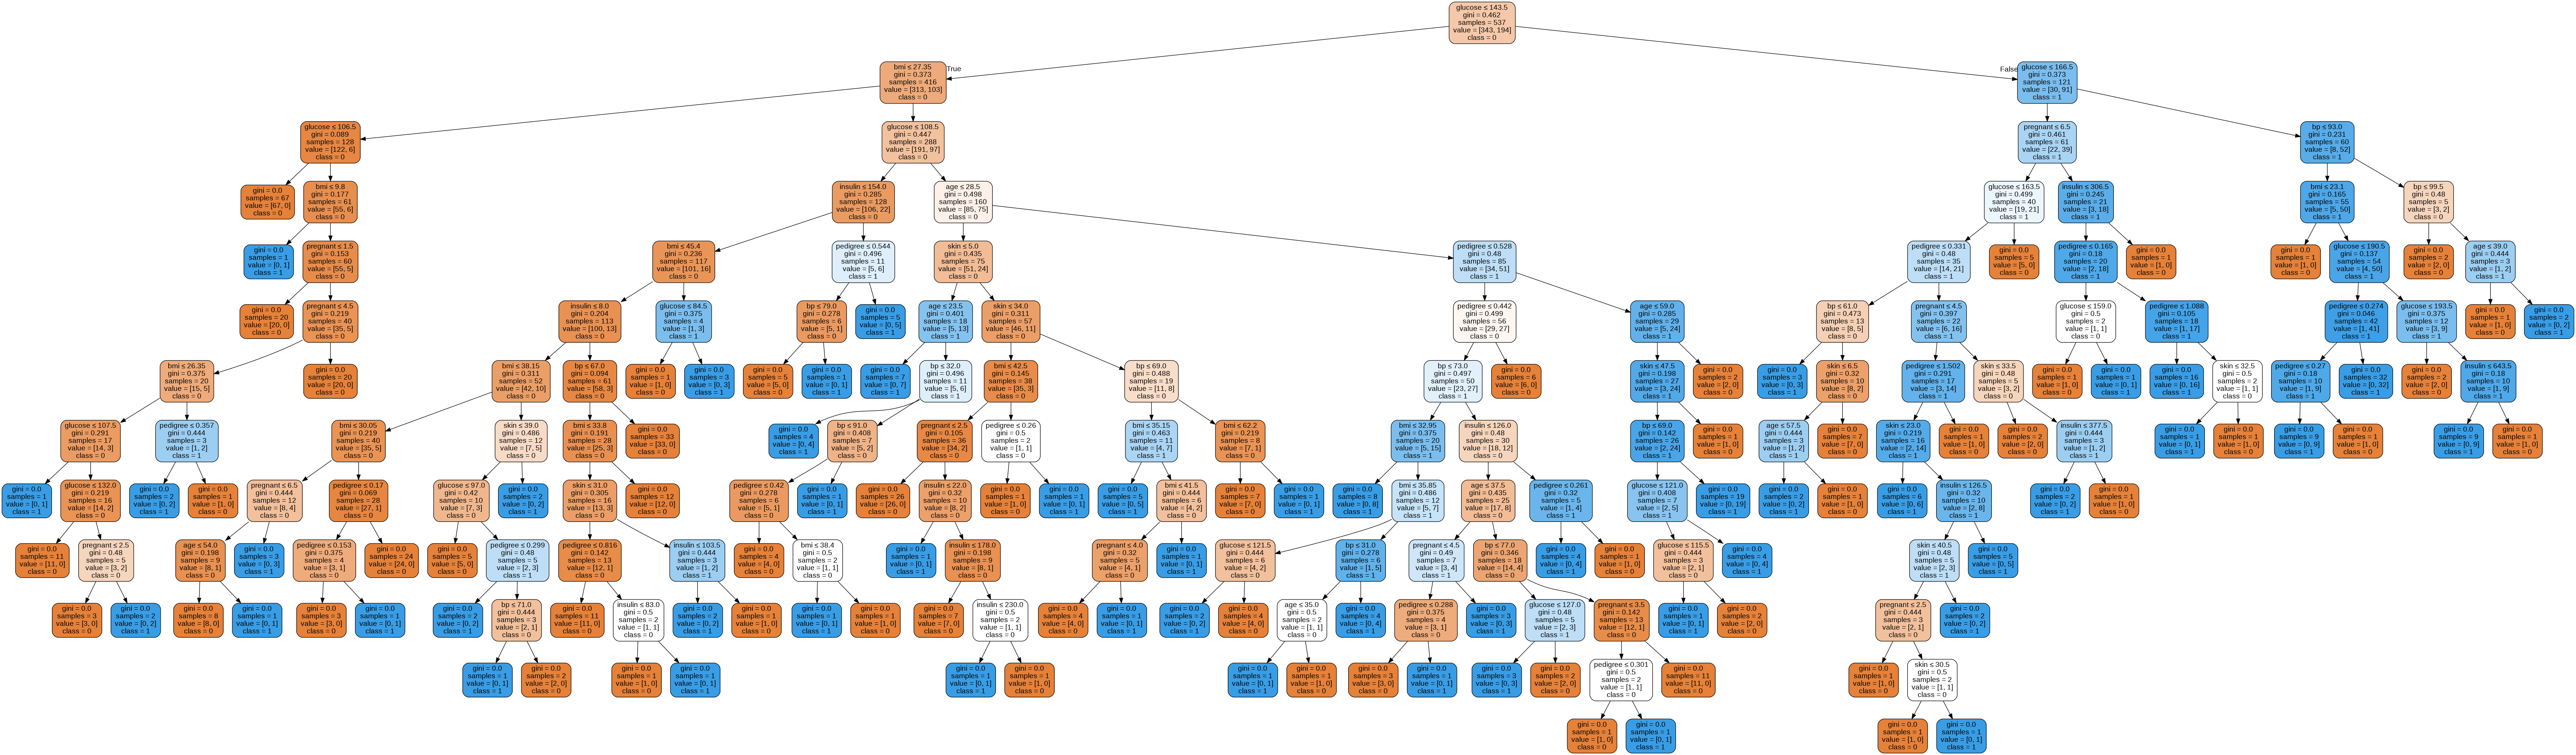

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node. You can open the .png file in a web browser or other tool so you can zoom-in to read the values. 

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by __pruning__. Pruning refers to the process of removing excessive part(s) of the tree - which is a useful step in post-processing, for the purpose of avoiding __over-fitting__.

## Optimizing Decision Tree Performance
### Pruning the Tree

You can prune your tree by specify any one, or any combination, of the following arguments in your `DecisionTreeClassifier` function:

- criterion : optional (`default=”gini”`) or Choose attribute selection measure: This parameter allows us to use a different attribute selection measure. Supported criteria are “gini” for the __Gini index__ and “entropy” for the __information gain__.

- splitter : string, optional (`default=”best”`) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the __best split__ and “random” to choose the __best random split__.

- max_depth : int or None, optional (`default=None`) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than `min_samples_split` samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

You can refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more information.

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with `max_depth=3`. Other than pre-pruning parameters, You can also try other attribute selection measure such as `criterion = 'entropy'`.

Let's build a new tree with pre-pruning embedded.

[Back to Top](#Background)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7619047619047619


You can observe that the accuracy improved when you remove the excessive part(s) of the tree - that is why pruning is __highly recommended__, if not required, in learning decision tree models.

We can also look at the confusion matrix and the classification report of the new tree.

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[131  26]
 [ 29  45]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.63      0.61      0.62        74

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.76      0.76      0.76       231



### Visualizing Decision Trees

We know that pruning help improving the model accuracy/performance; in addition, pruning also helps with visualizing the model since we define `max_depth = 3` - meaning the tree will only have `3` levels. You no longer have to zoom-in to read the tree.

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes-pruned.png')
Image(graph.create_png())

[Back to Top](#Background)

### Answer the question:

Read the tree above, which node has the best split (_hint: lowest entropy, meaning highest information gain value_)? Use the block below to provide your answer.

__Double click and type your answer here__

## Pros

[Source](https://scikit-learn.org/stable/modules/tree.html)

- Decision trees are easy to interpret and visualize.
- It can capture some of the Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. 

## Cons
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms (__ensemble__ or __random forest__).
- Decision trees are biased with imbalance dataset, so it is recommended to balance out the dataset before creating the decision tree.
- It is a linear-based model; some non-linear relationships in your dataset can NOT be captured by it.

## Conclusion
Congratulations, you have made it to the end of this tutorial!

In this tutorial, you covered a lot of details about Decision Tree; It's working, attribute selection measures such as Information Gain, Gain Ratio, and Gini Index, decision tree model building, visualization and evaluation on diabetes dataset using Python Scikit-learn package. Also, discussed its pros, cons, and optimizing Decision Tree performance using parameter tuning.

Hopefully, you can now utilize the Decision tree algorithm to analyze your own datasets.

[Back to Top](#Background)